In [6]:
import cv2
import torch
import mediapipe as mp
import matplotlib.pyplot as plt
from torch_geometric.data import Data

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3)

# Define All 33 Keypoints for Full Skeleton
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4),  # Right arm
    (0, 5), (5, 6), (6, 7), (7, 8),  # Left arm
    (0, 9), (9, 10), (10, 11), (11, 12),  # Upper torso
    (11, 23), (12, 24),  # Hips
    (23, 24), (23, 25), (24, 26),  # Waist to legs
    (25, 27), (26, 28), (27, 29), (28, 30),  # Knees to feet
    (15, 19), (16, 20), (19, 21), (20, 22),  # Hands & Fingers
    (9, 13), (13, 15), (10, 14), (14, 16)  # Shoulders to hands
]

# Function to Extract Keypoints and Create Graph
def test_skeleton_creation(image_path):
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ ERROR: Could not load image: {image_path}")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        print("❌ ERROR: No keypoints detected.")
        return

    # Extract keypoints and scale them to image size
    keypoints = []
    for landmark in results.pose_landmarks.landmark:
        if landmark.visibility > 0.5:  # ✅ Use only visible keypoints
            keypoints.append([landmark.x * image.shape[1], landmark.y * image.shape[0]])
        else:
            keypoints.append([None, None])  # Mark missing keypoints

    keypoints = torch.tensor(keypoints, dtype=torch.float)

    # Create PyG Data Graph
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    skeleton_graph = Data(x=keypoints, edge_index=edge_index)

    # ✅ Visualize Graph on Image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)

    # Draw Keypoints
    for x, y in keypoints:
        if x is not None and y is not None:
            plt.scatter(x, y, c="red", s=30)  # Mark keypoints

    # Draw Edges Only If Both Keypoints Exist
    for i, j in edges:
        if i < len(keypoints) and j < len(keypoints):
            x1, y1 = keypoints[i][:2]
            x2, y2 = keypoints[j][:2]
            if x1 is not None and y1 is not None and x2 is not None and y2 is not None:
                plt.plot([x1, x2], [y1, y2], "g-", linewidth=2)  # Connect joints

    plt.title("Full Body Skeleton Graph Overlay")
    plt.axis("off")
    plt.show()

    print("✅ Full skeleton graph successfully created!")

# Test with a Sample Image
test_skeleton_creation("/home/raichuboy/Projects/yoga/archive/train/Akarna_Dhanurasana/Akarna_Dhanurasana_image_1.jpg")  # Change this path to your actual image


I0000 00:00:1741706680.498118  328578 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1741706680.521914  329438 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.120), renderer: NVIDIA GeForce GTX 1650/PCIe/SSE2
W0000 00:00:1741706680.574367  329432 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1741706680.612045  329431 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


TypeError: must be real number, not NoneType

I0000 00:00:1741709683.975184  328578 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1741709683.998897  336177 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.120), renderer: NVIDIA GeForce GTX 1650/PCIe/SSE2
W0000 00:00:1741709684.054103  336169 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1741709684.086941  336167 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


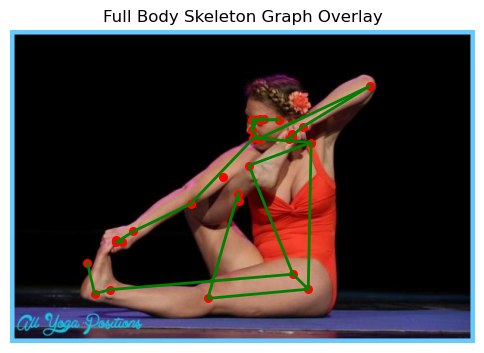

✅ Full skeleton graph successfully created!


In [8]:
import cv2
import torch
import mediapipe as mp
import matplotlib.pyplot as plt
from torch_geometric.data import Data
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3)

# Define All 33 Keypoints for Full Skeleton
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4),  # Right arm
    (0, 5), (5, 6), (6, 7), (7, 8),  # Left arm
    (0, 9), (9, 10), (10, 11), (11, 12),  # Upper torso
    (11, 23), (12, 24),  # Hips
    (23, 24), (23, 25), (24, 26),  # Waist to legs
    (25, 27), (26, 28), (27, 29), (28, 30),  # Knees to feet
    (15, 19), (16, 20), (19, 21), (20, 22),  # Hands & Fingers
    (9, 13), (13, 15), (10, 14), (14, 16)  # Shoulders to hands
]

# Function to Extract Keypoints and Create Graph
def test_skeleton_creation(image_path):
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ ERROR: Could not load image: {image_path}")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if not results.pose_landmarks:
        print("❌ ERROR: No keypoints detected.")
        return

    # Extract keypoints and scale them to image size
    keypoints = []
    for landmark in results.pose_landmarks.landmark:
        if landmark.visibility > 0.5:  # ✅ Only use confident keypoints
            keypoints.append([landmark.x * image.shape[1], landmark.y * image.shape[0]])
        else:
            keypoints.append([np.nan, np.nan])  # ✅ Replace None with NaN

    keypoints = np.array(keypoints)

    # Remove NaN keypoints for PyTorch compatibility
    valid_indices = ~np.isnan(keypoints).any(axis=1)  # ✅ Mask valid keypoints
    keypoints = keypoints[valid_indices]  # ✅ Remove invalid keypoints

    keypoints = torch.tensor(keypoints, dtype=torch.float)

    # Create PyG Data Graph
    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

    skeleton_graph = Data(x=keypoints, edge_index=edge_index)

    # ✅ Visualize Graph on Image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)

    # Draw Keypoints
    for x, y in keypoints:
        plt.scatter(x, y, c="red", s=30)  # Mark keypoints

    # Draw Edges Only If Both Keypoints Exist
    for i, j in edges:
        if i < len(keypoints) and j < len(keypoints):
            x1, y1 = keypoints[i][:2]
            x2, y2 = keypoints[j][:2]
            if not np.isnan(x1) and not np.isnan(y1) and not np.isnan(x2) and not np.isnan(y2):
                plt.plot([x1, x2], [y1, y2], "g-", linewidth=2)  # Connect joints

    plt.title("Full Body Skeleton Graph Overlay")
    plt.axis("off")
    plt.show()

    print("✅ Full skeleton graph successfully created!")

# Test with a Sample Image
test_skeleton_creation("/home/raichuboy/Projects/yoga/archive/train/Akarna_Dhanurasana/Akarna_Dhanurasana_image_1.jpg")  # Change this path to your actual image
